<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_tracking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://covidtracking.com/api

In [0]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np

In [3]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-15 16:04:06.319765


In [0]:
current_states = request.get('https://covidtracking.com/api/v1/states/current.json')
current_states_daily = request.get('https://covidtracking.com/api/v1/states/daily.json')
current_us = request.get('https://covidtracking.com/api/v1/us/current.json')

In [0]:
states = pd.DataFrame.from_dict(current_states.json())
states_daily = pd.DataFrame.from_dict(current_states_daily.json())
us = pd.DataFrame.from_dict(current_us.json())

In [6]:
states_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200614,AK,661.0,72806.0,NaN,11.0,NaN,NaN,NaN,1.0,NaN,411.0,A,6/14/2020 00:00,2020-06-14T00:00:00Z,06/13 20:00,12.0,NaN,2020-06-14T00:00:00Z,73467.0,NaN,NaN,NaN,02,7,1657,73467,73467,1664,73467,0,0,e4689615ee7b910984dc813a587128ae5b1b7335,0,0,0,0,0,
1,20200614,AL,25615.0,271840.0,NaN,540.0,2255.0,NaN,675.0,NaN,395.0,13508.0,B,6/14/2020 11:00,2020-06-14T11:00:00Z,06/14 07:00,773.0,2255.0,2020-06-14T11:00:00Z,NaN,NaN,NaN,25235.0,01,1014,3189,297455,297455,4203,297455,0,14,ad408ffeffbe5d1a8ac9b56586ecffe78dc2804c,0,0,0,0,0,
2,20200614,AR,12501.0,184488.0,NaN,204.0,998.0,NaN,NaN,46.0,162.0,8110.0,A,6/14/2020 00:00,2020-06-14T00:00:00Z,06/13 20:00,179.0,998.0,2020-06-14T00:00:00Z,NaN,NaN,NaN,12501.0,05,954,9018,196989,196989,9972,196989,3,19,7a1373dc0a9d41f463a820a16399802fdd3311c0,0,0,0,0,0,
3,20200614,AS,0.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,6/1/2020 00:00,2020-06-01T00:00:00Z,05/31 20:00,0.0,NaN,2020-06-01T00:00:00Z,NaN,NaN,NaN,NaN,60,0,0,174,174,0,174,0,0,a7f92ee7b46d1daadf91fe1ec880b62db8a3e7de,0,0,0,0,0,
4,20200614,AZ,35691.0,302354.0,NaN,1457.0,3726.0,452.0,NaN,317.0,NaN,6333.0,A+,6/14/2020 00:00,2020-06-14T00:00:00Z,06/13 20:00,1186.0,3726.0,2020-06-14T00:00:00Z,337728.0,NaN,NaN,35374.0,04,1233,8415,338045,338045,9648,338045,3,34,49ad7a0f959d01b5c2337b5247d51d80a96e4dd0,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,53,0,0,1,1,0,1,0,0,5372bd69fec11b6097c548b149e4e79fca8d21d2,0,0,0,0,0,
5669,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,53,0,0,1,1,0,1,0,0,4a8a13ff65ef1f0bb991324d98609c765c5b5849,0,0,0,0,0,
5670,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,53,0,0,1,1,0,1,0,0,488430e6f0d933476ca2120fe0ee2ecf4aac5b94,0,0,0,0,0,
5671,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,53,0,0,1,1,0,1,0,0,7ed011fe93129bbc13213e7028e7e1e299d67691,0,0,0,0,0,


In [0]:
ny_daily = states_daily.loc[states_daily['state'] == 'NY']

In [8]:
ny_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
37,20200614,NY,383324.0,2551275.0,NaN,1657.0,89995.0,499.0,NaN,346.0,NaN,68761.0,A,6/13/2020 00:00,2020-06-13T00:00:00Z,06/12 20:00,24551.0,89995.0,2020-06-13T00:00:00Z,NaN,NaN,NaN,383324.0,36,694,61665,2934599,2934599,62359,2934599,24,0,f807fc3c2646802e57ff5f1b55a02e67139c1bd2,0,0,0,0,0,
93,20200613,NY,382630.0,2489610.0,NaN,1734.0,89995.0,517.0,NaN,360.0,NaN,68584.0,A,6/12/2020 00:00,2020-06-12T00:00:00Z,06/11 20:00,24527.0,89995.0,2020-06-12T00:00:00Z,NaN,NaN,NaN,382630.0,36,916,69924,2872240,2872240,70840,2872240,32,0,fc7045a058c6900c23e63fea1169e0001b87fe29,0,0,0,0,0,
149,20200612,NY,381714.0,2419686.0,NaN,1898.0,89995.0,552.0,NaN,387.0,NaN,68399.0,A,6/12/2020 00:00,2020-06-12T00:00:00Z,06/11 20:00,24495.0,89995.0,2020-06-12T00:00:00Z,NaN,NaN,NaN,381714.0,36,822,71573,2801400,2801400,72395,2801400,53,0,b163ad0441c8a10074455029c10906cb5b434043,0,0,0,0,0,
205,20200611,NY,380892.0,2348113.0,NaN,2042.0,89995.0,581.0,NaN,424.0,NaN,68211.0,A,6/11/2020 00:00,2020-06-11T00:00:00Z,06/10 20:00,24442.0,89995.0,2020-06-11T00:00:00Z,NaN,NaN,NaN,380892.0,36,736,60103,2729005,2729005,60839,2729005,38,0,0fb149be1b73d602ac4593b54387e0547abe6206,0,0,0,0,0,
261,20200610,NY,380156.0,2288010.0,NaN,2190.0,89995.0,630.0,NaN,462.0,NaN,68019.0,A,6/10/2020 00:00,2020-06-10T00:00:00Z,06/09 20:00,24404.0,89995.0,2020-06-10T00:00:00Z,NaN,NaN,NaN,380156.0,36,674,61623,2668166,2668166,62297,2668166,56,0,722e71fad3e57cb807fbc0b220956ff9ffba50ca,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,36,29,0,197,197,29,197,0,0,901829a9e5fc464f6cc681700414c402be4a3e5a,0,0,0,0,0,
5533,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,36,43,0,404,168,43,168,0,0,d89d4fd0f52a89a9ec4eb9c5b53aeacb0ca734a0,0,0,0,0,0,
5573,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,36,11,16,361,125,27,125,0,0,f94d42b35ad1ddda0119f8f6d1e1f279da1c2c6e,0,0,0,0,0,
5600,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,36,16,28,122,98,44,98,0,0,752b04989071ad3abf68fa8717a64db82895cced,0,0,0,0,0,


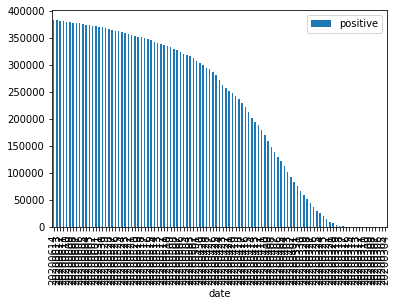

In [9]:
ny_daily.plot(x='date', y='positive', kind='bar')